In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

df = pd.read_csv('midterm_data.csv')
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [86]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Data Cleaning

In [87]:
col = list(df.columns)
print(col)

['userID', 'age', 'sessions', 'time_spent', 'pages_visited', 'cart_items', 'cart_value', 'checkout_status', 'device', 'location']


In [88]:
df.isna().mean()

userID             0.000
age                0.000
sessions           0.000
time_spent         0.000
pages_visited      0.000
cart_items         0.000
cart_value         0.000
checkout_status    0.000
device             0.020
location           0.006
dtype: float64

As missing values are less than 10% for device and location, both observation types can be dropped from the analysis. 

In [89]:
df = df.dropna(subset=['device', 'location'])
df.isna().mean()

userID             0.0
age                0.0
sessions           0.0
time_spent         0.0
pages_visited      0.0
cart_items         0.0
cart_value         0.0
checkout_status    0.0
device             0.0
location           0.0
dtype: float64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


4871 entries remain. A combined total of approx. 2.6% of the observations were dropped by jointly dropping device and location empties. Let's re-run some descriptive statistics. 

In [91]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871,4871
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2522,1028
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455,NaN,NaN
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778,NaN,NaN
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000,NaN,NaN
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000,NaN,NaN
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000,NaN,NaN


From the data, we see: the mean age is 41.5 that is in-line with median of 42. Similarly, variables such as sessions, time_spent, pages_visited, cart_items and cart value have means which compare to their respective medians. Thus, the skew caused by outliers for these parameters is low. Given that the skew caused on measures of center is low, the outliers are maintained as relavant to analysis as they may present some of our best (and most indecisive) shoppers.

Lastly, we note that checkout status has a mean close of 0.273 which is reflective of the problem statement. Let's begin to assess for behavioural trends using graphing and groupbys. 

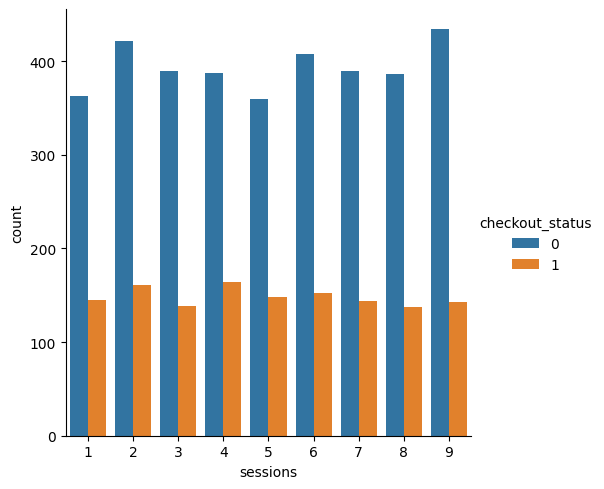

In [92]:
sns.catplot(x='sessions', hue='checkout_status', data=df, kind='count')
plt.show()

With an increase in the number of sessions, we see that the number of purchases remains fairly constant. Let's use Pearson's correlation matrix to determine the signficant linear correlations to assess which parameters have the largest direct effect on checkout_status. 

In [93]:
df.corr(numeric_only=True)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
userID,1.000000,0.009744,0.035118,-0.002762,0.013663,-0.005945,-0.007728,-0.013876
age,0.009744,1.000000,0.020722,-0.019453,-0.021942,-0.002114,-0.001506,-0.013017
sessions,0.035118,0.020722,1.000000,-0.017793,-0.008571,-0.023971,-0.027667,-0.019821
time_spent,-0.002762,-0.019453,-0.017793,1.000000,0.911349,-0.007222,-0.004456,0.383940
pages_visited,0.013663,-0.021942,-0.008571,0.911349,1.000000,-0.009649,-0.009155,0.361587
cart_items,-0.005945,-0.002114,-0.023971,-0.007222,-0.009649,1.000000,0.877359,-0.088606
cart_value,-0.007728,-0.001506,-0.027667,-0.004456,-0.009155,0.877359,1.000000,-0.079790
checkout_status,-0.013876,-0.013017,-0.019821,0.383940,0.361587,-0.088606,-0.079790,1.000000


In terms of linear relationships, we see the most significant positive correlation between time_spent and pages_visits and the target variable checkout_status. These variables appear to be highly colinear. We will explore the effects of these variables first. 

Some other insights: 
- Cart value is only slightly negatively correlated to checkout_status. This means that the more expensive a user's cart is, the the user is on-average abandoning the cart.
- Cart items and cart value are highly co-linear which is in accordance our expectations i.e. as the number of cart items increase, so to does the cost. 

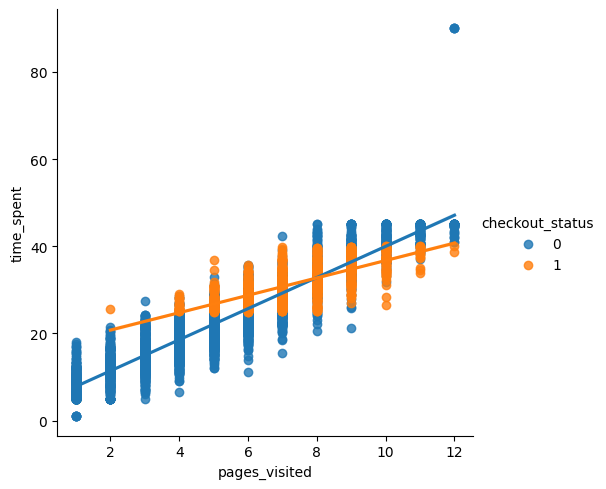

In [94]:
sns.lmplot(x='pages_visited', y='time_spent', hue='checkout_status', data=df)
plt.show()

We do see the presence of a few outliers in the data. There is one user who spent an abnormal amount of time browsing and did not purchase. Similarly, there is a user who visited only 2 pages and purchased relatively quickly. We will locate and assess those users. 

In [95]:
purchased_t = df[df['checkout_status'] == 1]['time_spent']
passed_t = df[df['checkout_status'] == 0]['time_spent']

print('Purchased Average Time Spent:', round(purchased_t.mean(),2), 'minutes')
print('Abandoned Average Time Spent:', round(passed_t.mean(),2), 'minutes')

Purchased Average Time Spent: 31.32 minutes
Abandoned Average Time Spent: 22.86 minutes


In [96]:
t_stat, p_val = stats.ttest_ind(purchased_t, passed_t)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 29.01437884807354
P-value: 7.252646363809769e-171


We see that the average time spent for a user who purchased is 31.32 minutes which is higher than the average time spent for a user who did not purchase 22.86 min. As the p-value is less than 0.05, we see that the means are significantly different at the 95% confidence interval. Let's repeat for pages visited.

In [97]:
purchased_pv = df[df['checkout_status'] == 1]['pages_visited']
passed_pv = df[df['checkout_status'] == 0]['pages_visited']

print('Purchased Average Pages Viewed:', round(purchased_pv.mean(),2), 'pages')
print('Passed Average Pages View', round(passed_pv.mean(),2), 'pages')

Purchased Average Pages Viewed: 7.29 pages
Passed Average Pages View 5.21 pages


In [98]:
t_stat, p_val = stats.ttest_ind(purchased_pv, passed_pv)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 27.061980794784017
P-value: 2.253044494394405e-150


We see that the average pages viewed for a user who purchased is 7.29 pages which is higher than the average pages viewed for a user who did not purchase (5.21). As the p-value is less than 0.05, we see that the means are significantly different at the 95% confidence interval.

In [202]:
purchased_cv = df[df['checkout_status'] == 1]['cart_value']
passed_cv = df[df['checkout_status'] == 0]['cart_value']

mean_purchased_cv = purchased_cv.mean()
mean_passed_cv = passed_cv.mean()

print('Purchased Average Cart Value: $', round(mean_purchased_cv,2))
print('Passed Average Cart View: $', round(passed_pv.mean(),2))
print('% Difference:', round((mean_purchased_cv-mean_passed_cv)/mean_passed_cv, 2))


Purchased Average Cart Value: $ 140.51
Passed Average Cart View: $ 152.83
% Difference: -0.08


As we saw in the correlation matrix, there is a 8% differenced in the average cart value between the two groups. Below we confirm that the difference in the means is statistically signficant at the 95% confidence interval. 

In [203]:
t_stat, p_val = stats.ttest_ind(purchased_cv, passed_cv)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -5.58542237803329
P-value: 2.4580059099364027e-08


The Pearson's matrix helped us assess the correlation between numerical variables but we must also assess trends in the categorical variables. 

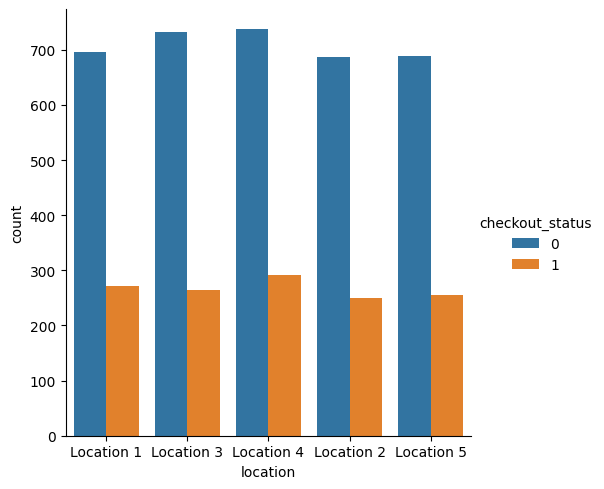

In [204]:
# To ensure the correct interpretation of the Pearson's matrix, 
# let's visually assess the effect on age on the checkout status.
sns.catplot(x='location', hue='checkout_status', data=df, kind='count')
plt.show()

In [205]:
contingency_table = pd.crosstab(df['checkout_status'], df['location'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 1.2726182220920996
P-value: 0.8660038302302356


In line with the graph, we see no real statistically signficant trends for purchasers from a particular location. Check to see if there is signficant value:

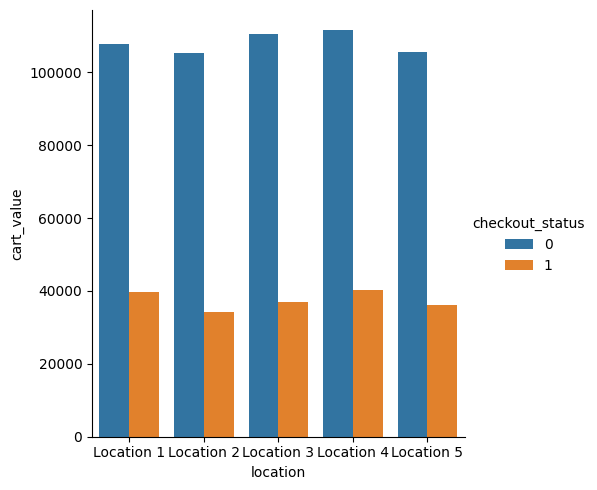

In [206]:
loc_sale = df.groupby(['checkout_status', 'location'])['cart_value'].sum().reset_index()
sns.catplot(x='location', y = 'cart_value', hue='checkout_status', data=loc_sale, kind='bar')
plt.show()

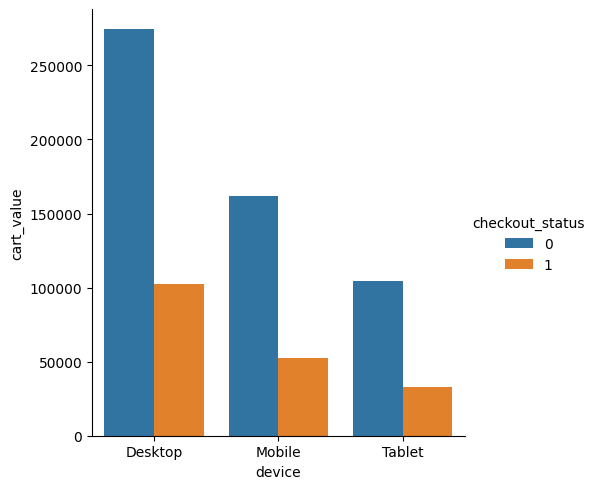

In [207]:
dev_sale = df.groupby(['checkout_status', 'device'])['cart_value'].sum().reset_index()
sns.catplot(x='device', y = 'cart_value', hue='checkout_status', data=dev_sale, kind='bar')
plt.show()

In [208]:
contingency_table = pd.crosstab(df['checkout_status'], df['device'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 4.019064161843586
P-value: 0.13405138519652812


At a 95% confidence level, we can reject the null hypothesis that the device type has no effect on the checkout status. However, if we adjust our signficance level to 85% (as business problems are less sensitive), we see that device type has a statitically signficant effect on checkout rate at the 85%.

For completion, let's use feature engineering to "bucket" the age groups to determine any demographic trends by count. 

In [209]:
df['age_cat'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 55, 65])
print(df['age_cat'].value_counts())

(55, 65]    1048
(45, 55]     995
(35, 45]     985
(25, 35]     976
(15, 25]     867
Name: age_cat, dtype: int64


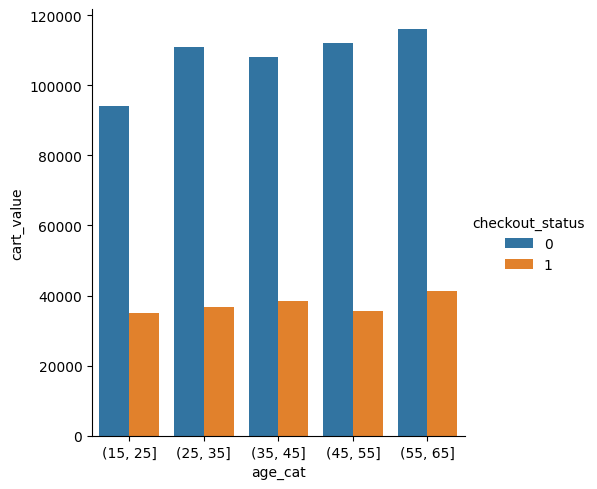

In [210]:
age_sale = df.groupby(['checkout_status', 'age_cat'])['cart_value'].sum().reset_index()
sns.catplot(x='age_cat', y = 'cart_value', hue='checkout_status', data=age_sale, kind='bar')
plt.show()

In [211]:
contingency_table = pd.crosstab(df['checkout_status'], df['age_cat'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 4.312081748524441
P-value: 0.36541465830145503


No statistical signficance was found between the checkout status and age bins at an acceptable confidence interval. We anticipated this from the Pearson's correlation matrix above. 

In summary, 

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

At a 95% level of signficance, the analysis concludes: 
- The average time spent for a user who purchased is 31.32 minutes which is higher than the average time spent for a user who did not purchase 22.86 min.
- The average pages viewed for a user who purchased is 7.29 pages which is higher than the average pages viewed for a user who did not purchase (5.21). 
- As we saw in the correlation matrix, there is only a 8% difference in the average cart value between purchasers and non-purchasers. Non-purchasers tended to have the higher average cart value (152.83 dollars) whereas purchasers on average had a lower average cart value: $ 140.51
- No real statistically signficant trends for purchasers from a particular location by purchase volume or value. 
- No real statistically signficant trends for purchasers by demographic data (age). In fact, age groups are relatively equal in overall value. 


At the 85% level of significant, the analysis concludes: 
- On average, desktop users are more likely to check-out than mobile or tablet users by purchase volume (omitted for brevity, not shown) and by purchase value (shown). 

The number of sessions was found to have little overall effect on check-out status and was not explored further. 

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

The data was found to be relatively clean. Missing values (less than 3%) overall were dropped as total observations are numerous and less than the 10% threshold. No imputation was conducted as the missing observations pertained to variables were categorical in nature. The addition of 'unknown' would increase dimensionality and use of the mode may skew results. Given their limited representation, dropping the missing values was determined to be the best strategy. Outliers were preserved as they were found to cause little to no effect of measures of central tendency but did represent the opportunity to assess key users. 

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

The product team should target users who spend on average at least 31 minutes browsing or view 7.3 pages. The product team should not aim to have users spending more than $140 per session as it is found to reduce the likelihood of checkout marginally. Lastly, desktop users are found to be more likely to purchase over other device access types and users on alternative devices should be pursuaded to switch to a desktop.  